In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jocelynpender/Documents/02 - AREAS/Career/2025 Update/Crossref/interview-prep/sample-data/aggregated_data_expanded_rows_trim.csv')


In [29]:
# Prepare variables for use in notebook

df['Has Reference: Outgoing'] = df['reference'].apply(lambda x: 'No References: Reference Field Not Used' if pd.isnull(x) else 'Has References')
df['Is Cited: Incoming'] = df['is-referenced-by-count'].apply(lambda x: 'Never Cited: Incoming' if x == 0 else 'Is Cited: Incoming' if x > 0 else None)
df['Log Is Cited By Count: Incoming'] = np.log1p(df['is-referenced-by-count'])
df['Log Reference-Count'] = np.log1p(df['reference-count'])


In [30]:
num_rows = df.shape[0]
distinct_members = df['member'].nunique()

print(f'Let\'s take a sample dataset represented by {num_rows} records represented by {distinct_members} unique members.')

Let's take a sample dataset represented by 10000 records represented by 1386 unique members.


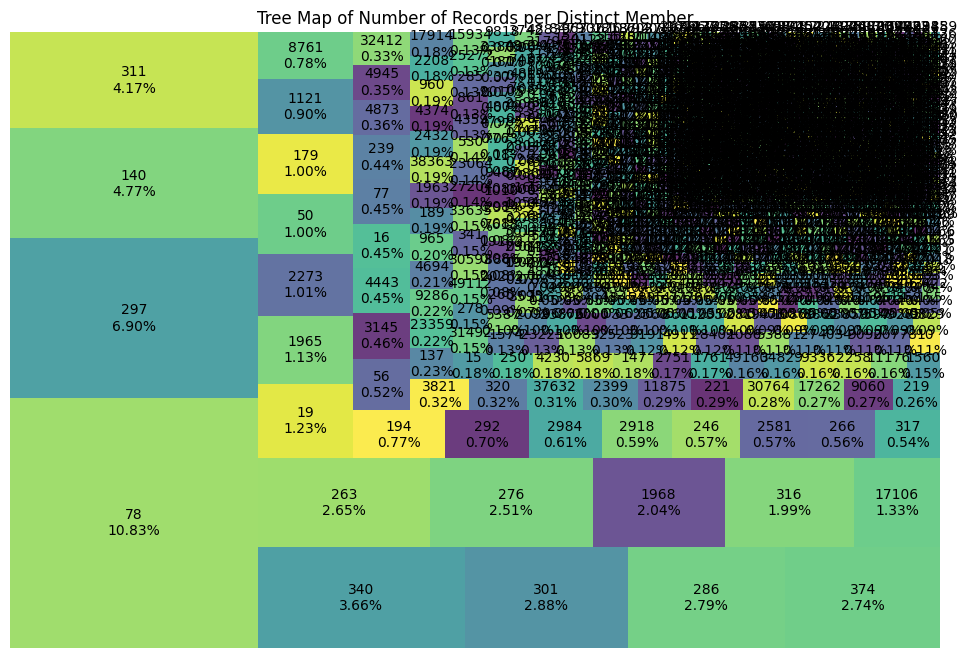

In [31]:
import squarify

import matplotlib.pyplot as plt

# Count the number of records per distinct member
member_counts = df['member'].value_counts()

# Create a tree map
plt.figure(figsize=(12, 8))
# Calculate the percentage of total number of records
labels = [f'{label}\n{count/num_rows:.2%}' for label, count in zip(member_counts.index, member_counts.values)]

# Update the plot with the new labels
squarify.plot(sizes=member_counts.values, label=labels, alpha=.8)
plt.title('Tree Map of Number of Records per Distinct Member')
plt.axis('off')
plt.show()

Only 10% of these works are cited by others.

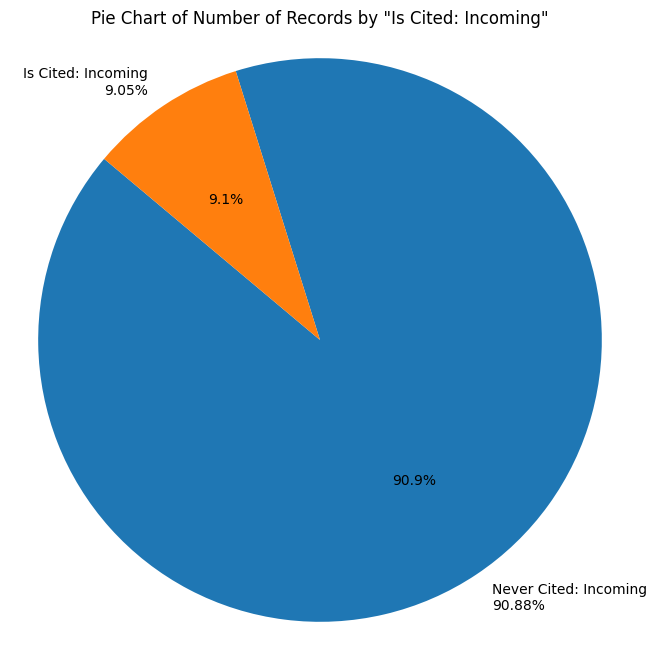

In [32]:
# Count the number of records by 'Is Cited: Incoming'
cited_counts = df['Is Cited: Incoming'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cited_counts, labels=[f'{label}\n{count/num_rows:.2%}' for label, count in zip(cited_counts.index, cited_counts.values)], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Number of Records by "Is Cited: Incoming"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

How many records use the reference field?

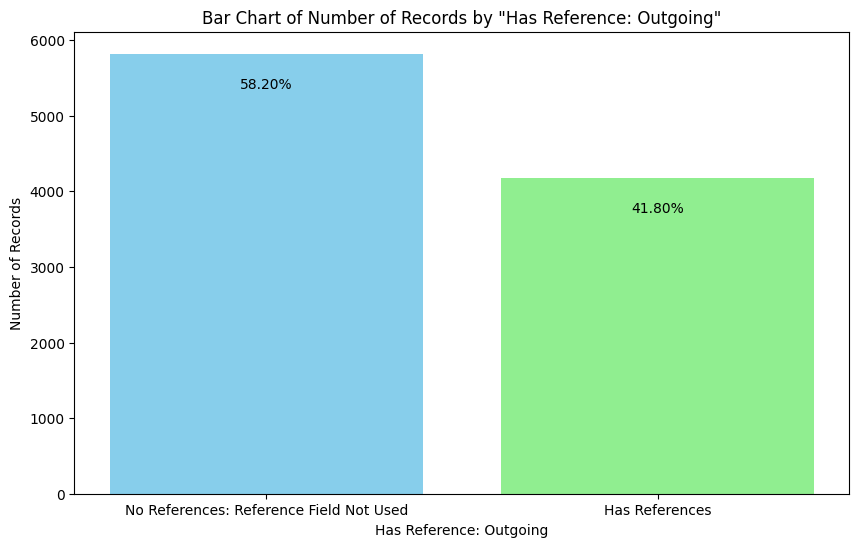

In [34]:
# Count the number of records by 'Has Reference: Outgoing'
reference_counts = df['Has Reference: Outgoing'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(reference_counts.index, reference_counts.values, color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for bar, count in zip(bars, reference_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, f'{count/num_rows:.2%}', ha='center', va='bottom', color='black')

plt.title('Bar Chart of Number of Records by "Has Reference: Outgoing"')
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Number of Records')
plt.show()

Among these groups, how many records were cited by other works?

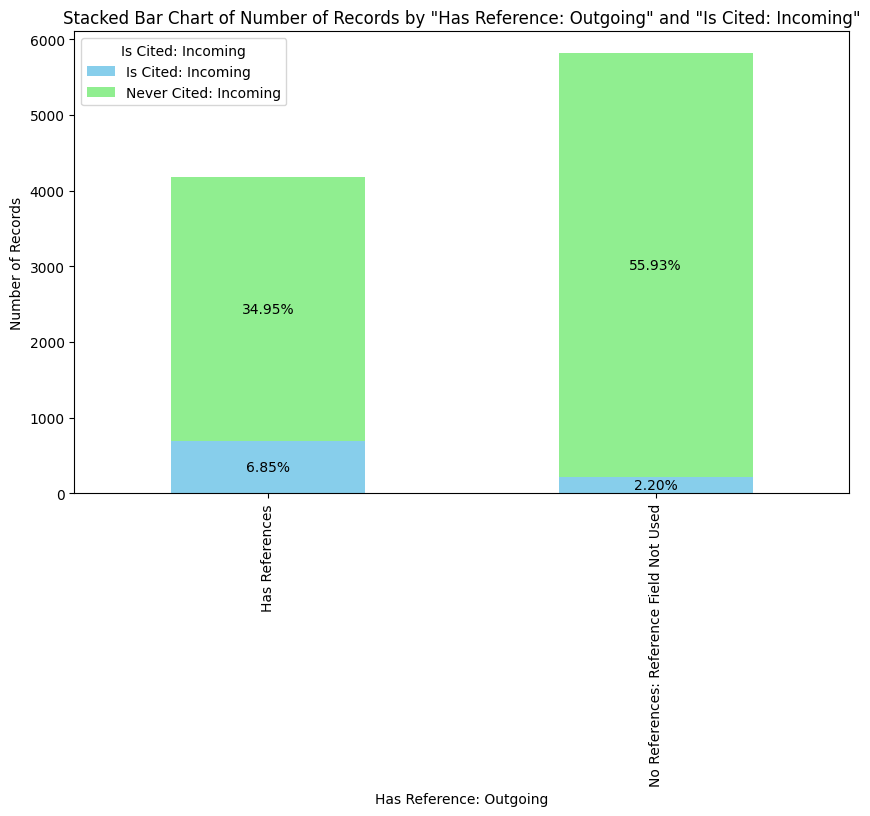

In [35]:
# Create a crosstab to get the counts
crosstab = pd.crosstab(df['Has Reference: Outgoing'], df['Is Cited: Incoming'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/num_rows:.2%}' for v in container.datavalues], label_type='center')

plt.title('Stacked Bar Chart of Number of Records by "Has Reference: Outgoing" and "Is Cited: Incoming"')
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Number of Records')
plt.show()